In [1]:
import pandas as pd

df = pd.read_csv("texts.csv", index_col=0)
df.head()

,text
0,BATUHAN ERDURCAN \r\n21301855 \r\nTURK 101-13 ...
1,\r\nYalçın Arslan \r\n21300458 \r\nAslı Uçar ...
2,Sudenur SOYSAL \r\nGÜZELLİK Mİ ÇİRKİNLİK Mİ HA...
3,Mars’ta Yaşam mı? \r\n \r\nHayatım boyunca evr...
4,"Bir Şehrin İki Yakasında \r\n \r\n""İki büyük c..."


In [43]:
from similarity import shingling, matrix_representation, signature_matrix, iterative_hash_matrix
S = []
num_docs = 25
for r in df[:num_docs].iterrows():
    s = shingling(r[1]["text"], 15)
    S.append(s)
#    print(r[1]["text"])
#    print("----")

# explore some lengths
(len(S[0]),
len(S[1]),
len(S[0] | S[1]))

(4051, 3812, 7860)

In [51]:
M = matrix_representation(S)
M

<111454x25 sparse matrix of type '<class 'numpy.int32'>'
	with 111939 stored elements in COOrdinate format>

In [52]:
H = iterative_hash_matrix(M, 10)
H

array([[ 7, 14,  7, ...,  7,  7,  7],
       [ 8, 16,  8, ...,  8,  8,  8],
       [ 9, 18,  9, ...,  9,  9,  9],
       ...,
       [ 4,  8,  4, ...,  4,  4,  4],
       [ 5, 10,  5, ...,  5,  5,  5],
       [ 6, 12,  6, ...,  6,  6,  6]], dtype=uint32)

In [53]:
import numpy as np

def signature_matrix(M, H):
    G = np.full([H.shape[1], M.shape[1]], np.inf)
    #l = M.shape[0],
    nz = M.nonzero()
    l = len(nz[0])
    print(l)
#for i in range(l):
    rid, cid = nz[0][:], nz[1][:]
    G[:, cid] = np.minimum(G[:, cid], H.T[:, rid])
    """
    for rid in range(l):
        r = M.getrow(rid)
        for idx in range(r.shape[1]):
            x = r[0, idx]
            if x == 1:
                G[:, idx] = np.minimum(G[:, idx], H.T[:, rid])
            
      #  print(G)
    """
    return G

G = signature_matrix(M, H)
G

111939


array([[4.05700e+03, 7.86600e+03, 1.23310e+04, 1.65310e+04, 2.16690e+04,
        2.54430e+04, 2.92700e+04, 3.37470e+04, 3.82100e+04, 4.22010e+04,
        4.62750e+04, 5.00960e+04, 5.42950e+04, 5.82700e+04, 6.30200e+04,
        6.77350e+04, 7.25170e+04, 7.86150e+04, 8.27480e+04, 8.67960e+04,
        9.06170e+04, 9.78570e+04, 1.03150e+05, 1.07180e+05, 6.00000e+00],
       [8.11400e+03, 1.57320e+04, 2.46620e+04, 3.30620e+04, 4.33380e+04,
        5.08860e+04, 5.85400e+04, 6.74940e+04, 7.64200e+04, 8.44020e+04,
        9.25500e+04, 1.00192e+05, 1.08590e+05, 5.08600e+03, 1.45860e+04,
        2.40160e+04, 3.35800e+04, 4.57760e+04, 5.40420e+04, 6.21380e+04,
        6.97800e+04, 8.42600e+04, 9.48460e+04, 1.02906e+05, 1.20000e+01],
       [4.05700e+03, 7.86600e+03, 1.23310e+04, 1.65310e+04, 2.16690e+04,
        2.54430e+04, 2.92700e+04, 3.37470e+04, 3.82100e+04, 4.22010e+04,
        4.62750e+04, 5.00960e+04, 5.42950e+04, 5.82700e+04, 6.30200e+04,
        6.77350e+04, 7.25170e+04, 7.86150e+04, 8.

In [54]:
 import scipy.spatial.distance as sp_dist

print(G.shape)
#for i in range(G.shape[1]):
#    for j in range(i + 1, G.shape[1]):
#        print(i+1, j+1, 1 - sp_dist.jaccard(G[:, i], G[:,j]))

(10, 25)


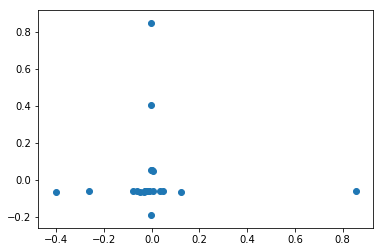

In [56]:
tsne = manifold.LocallyLinearEmbedding(4, n_components=2,
                                      method='standard')
X_tsne = tsne.fit_transform(M.toarray().T)

X_tsne[:, 1]

import matplotlib as plt
plt.pyplot.scatter(x=X_tsne[:, 1], y=X_tsne[:, 0])